In [2]:
# Install a pip package in the current Jupyter kernel - https://jakevdp.github.io/blog/2017/12/05/installing-python-packages-from-jupyter/
import sys
!{sys.executable} -m pip install matplotlib numpy scipy
sys.path.append('.')
import plotUtil


[notice] A new release of pip is available: 23.0 -> 23.2.1
[notice] To update, run: python3.10 -m pip install --upgrade pip


Plot the number of unique genomes at each iteration, along with the count of genomes that were removed and added at each iteration.

In [38]:
import json
import matplotlib.pyplot as plt
import numpy as np
#json_file_path = '/Users/bthj/QD/conf-duration_delta_pitch_combinations/evolution-run-analysis_qd-scores,cell-scores,coverage,elite-generations,genome-statistics,genome-sets,variance,elites-energy,goal-switches,lineage,duration-pitch-delta-velocity-combinations_step-1000_thrshld_0.5_1685817612663.json'
# json_file_path = '/Users/bthj/QD/conf-static_mutation_rate_combinations/evolution-run-analysis_qd-scores,cell-scores,coverage,elite-generations,genome-statistics,genome-sets,variance,elites-energy,goal-switches,lineage,duration-pitch-delta-velocity-combinations_step-1000_thrshld_0.5_1685832633591.json'
json_file_path = '/Users/bjornpjo/Developer/apps/kromosynth-cli/cli-app/conf/evolution-run-analysis_qd-scores,cell-scores,coverage,elite-generations,genome-statistics,genome-sets,variance,elites-energy,goal-switches,lineage,duration-pitch-delta-velocity-combinations_step-1000_1693487991208.json'
x_multiplier = 1000  # Set this value as the step size in the JSON file name
title = "genomeSets: " + json_file_path.split('/')[4]

# Read data from JSON file
data = plotUtil.read_data_from_json(json_file_path)

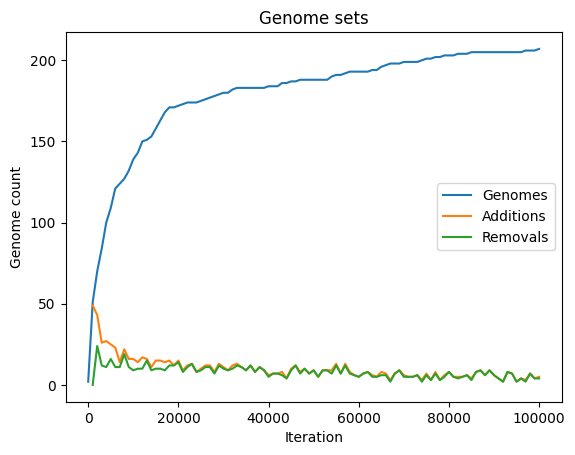

In [5]:
# Get three 1D data arrays from the JSON data at evoRuns[0].iterations[0].genomeSets: genomeCount, genomeSetsAdditions and getnomeSetsRemovals
genomeCount = data['evoRuns'][0]['iterations'][0]['genomeSets']['genomeCount']
genomeSetsAdditions = data['evoRuns'][0]['iterations'][0]['genomeSets']['genomeSetsAdditions']
genomeSetsRemovals = data['evoRuns'][0]['iterations'][0]['genomeSets']['genomeSetsRemovals']

# Plot the three arrays in one plot
plt.plot(np.arange(len(genomeCount)) * x_multiplier, genomeCount, label='Genomes')
plt.plot(np.arange(len(genomeSetsAdditions)) * x_multiplier, genomeSetsAdditions, label='Additions')
plt.plot(np.arange(len(genomeSetsRemovals)) * x_multiplier, genomeSetsRemovals, label='Removals')

# plt.plot(genomeCount, genomeSetsAdditions, label='Additions')
# plt.plot(genomeCount, genomeSetsRemovals, label='Removals')
plt.xlabel('Iteration')
plt.ylabel('Genome count')
plt.title('Genome sets')
plt.legend()
plt.show()


**For all evoruns**: Plot the number of unique genomes at each iteration, along with the count of genomes that were removed and added at each iteration.

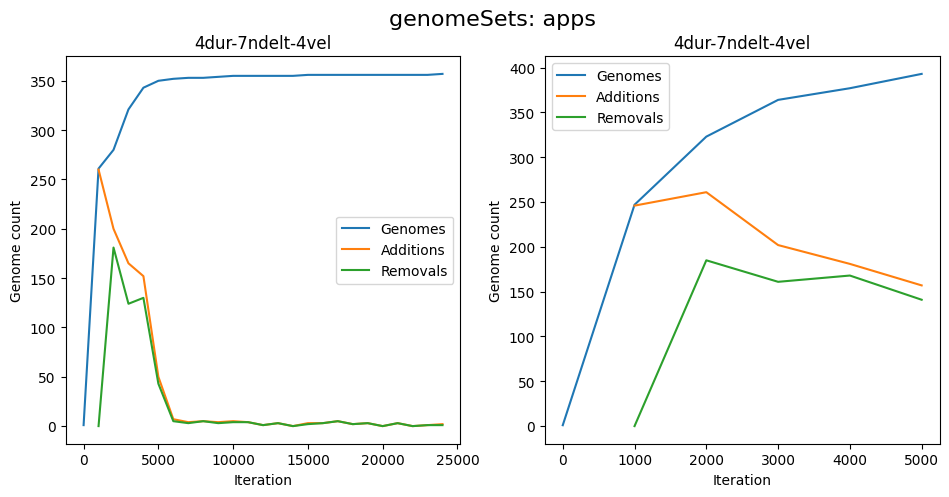

In [41]:
genome_sets_arrays = plotUtil.extract_data_arrays(data, 'genomeSets', False)

def plotGenomeSets(plt, ax, x_values, value, label):

    if len(label) > 50:
        label = label[:50] + '\n' + label[50:]
        plt.subplots_adjust(hspace=0.4)
        # add space for the second line of the title
        plt.subplots_adjust(top=0.96)

    genomeCount = value['genomeCount']
    genomeSetsAdditions = value['genomeSetsAdditions']
    genomeSetsRemovals = value['genomeSetsRemovals']
    ax.plot(np.arange(len(genomeCount)) * x_multiplier, genomeCount, label='Genomes')
    ax.plot(np.arange(len(genomeSetsAdditions)) * x_multiplier, genomeSetsAdditions, label='Additions')
    ax.plot(np.arange(len(genomeSetsRemovals)) * x_multiplier, genomeSetsRemovals, label='Removals')
    ax.set_xlabel('Iteration')
    ax.set_ylabel('Genome count')
    ax.set_title(label)
    ax.legend()

plotUtil.render_graphs(genome_sets_arrays, x_multiplier, plotGenomeSets, 10, 5, title, 100)